In [169]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

In [170]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)


(60000, 28, 28)


In [171]:
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)
print("Train labels shape:", y_train.shape)


Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)
Train labels shape: (60000,)


In [172]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())


Min pixel value: 0.0
Max pixel value: 1.0


In [173]:
x_train = x_train.reshape((60000, 28 * 28))
x_test = x_test.reshape((10000, 28 * 28))
print("New train shape:", x_train.shape)


New train shape: (60000, 784)


In [179]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(10, activation='softmax')
])

In [180]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 538,890 (2.06 MB)

 Trainable params: 537,354 (2.05 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [181]:
model.compile(
    optimizer= keras.optimizers.RMSprop(learning_rate=0.0003),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [182]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop]
)


Epoch 1/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.7643 - loss: 0.6821 - val_accuracy: 0.8620 - val_loss: 0.3864
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8510 - loss: 0.4156 - val_accuracy: 0.8695 - val_loss: 0.3635
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8664 - loss: 0.3730 - val_accuracy: 0.8762 - val_loss: 0.3462
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8740 - loss: 0.3502 - val_accuracy: 0.8725 - val_loss: 0.3448
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8826 - loss: 0.3236 - val_accuracy: 0.8752 - val_loss: 0.3471
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8850 - loss: 0.3167 - val_accuracy: 0.8763 - val_loss: 0.3439
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8904 - loss: 0.3029 - val_accuracy: 0.8898 - val_loss: 0.3249
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8955 - loss: 0.2862 - 

In [183]:
print("History keys:", history.history.keys())

History keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [184]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) + 1)


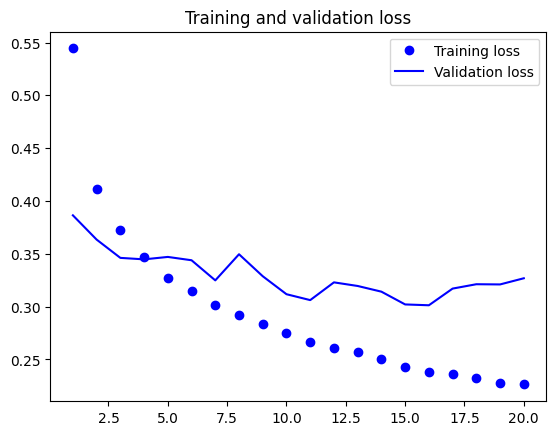

In [185]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.title('Training and validation loss')
plt.show()


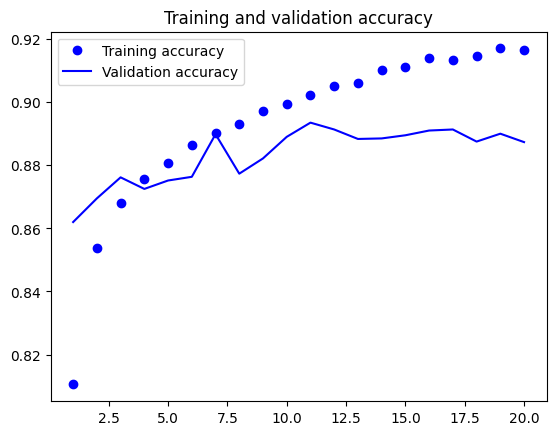

In [186]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.show()


In [187]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8893 - loss: 0.3254
Test accuracy: 0.8866000175476074


In [188]:
prediction = model.predict(x_test[0].reshape(1, 784))
print("Predicted class:", np.argmax(prediction))
print("True class:", y_test[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Predicted class: 9
True class: 9
